In [ ]:
# Initial assessment 
import pandas as pd

demographic_data = pd.read_csv("data/training_data/mixed_demographics.csv")


print("\n--- BASIC INFO ---")
print(f"Shape (rows, columns): {demographic_data.shape}")
print("\nColumn names:")
print(demographic_data.columns.tolist())

print("\nData types and non-null counts:")
demographic_data.info()


print("\n--- SAMPLE ROWS ---")
print(demographic_data.head(10))


print("\n--- SUMMARY STATISTICS ---")
print(demographic_data.describe(include='all'))


print("\n--- MISSING VALUES PER COLUMN ---")
print(demographic_data.isna().sum())


duplicates = demographic_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


print("\n--- UNIQUE VALUES PER COLUMN ---")
for col in demographic_data.columns:
    unique_vals = demographic_data[col].nunique()
    print(f"{col}: {unique_vals} unique values")


cat_cols = demographic_data.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print("\n--- CATEGORY DISTRIBUTIONS ---")
    for col in cat_cols:
        print(f"\n{col} value counts:")
        print(demographic_data[col].value_counts().head(10))

num_men = demographic_data["sex"].sum()  # True counts as 1, False as 0
print(f"There are {num_men} men.")
print(f"There are {900 - num_men} men.")


--- BASIC INFO ---
Shape (rows, columns): (900, 9)

Column names:
['Unnamed: 0', 'MI', 'age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP', 'sex']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    900 non-null    int64  
 1   MI            900 non-null    object 
 2   age           900 non-null    float64
 3   BMI           900 non-null    float64
 4   height        900 non-null    float64
 5   weight        900 non-null    float64
 6   diastolic_BP  900 non-null    float64
 7   systolic_BP   900 non-null    float64
 8   sex           900 non-null    bool   
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 57.3+ KB

--- SAMPLE ROWS ---
   Unnamed: 0       MI        age        BMI      height     weight  \
0           0  healthy  62.593012  25.312186  161.647749  64.94910

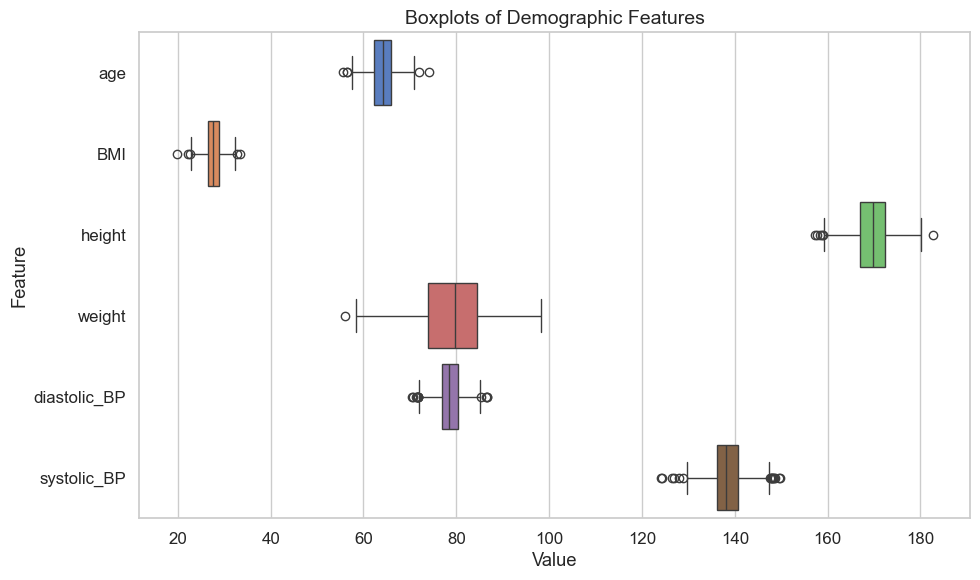

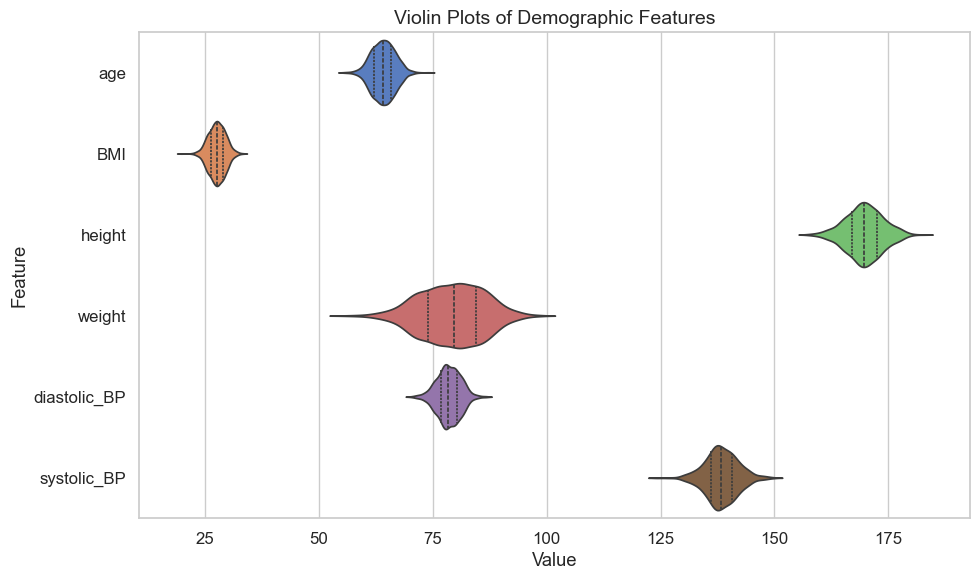

In [12]:
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

demographic_data = pd.read_csv("data/training_data/mixed_demographics.csv")

# Select numeric features (exclude 'Unnamed: 0', 'MI', and 'sex')
numeric_cols = ['age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP']

# Set up a clean style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- Boxplots ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=demographic_data[numeric_cols], orient='h')
plt.title("Boxplots of Demographic Features", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# --- Violin Plots ---
plt.figure(figsize=(10, 6))
sns.violinplot(data=demographic_data[numeric_cols], orient='h', inner='quartile')
plt.title("Violin Plots of Demographic Features", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



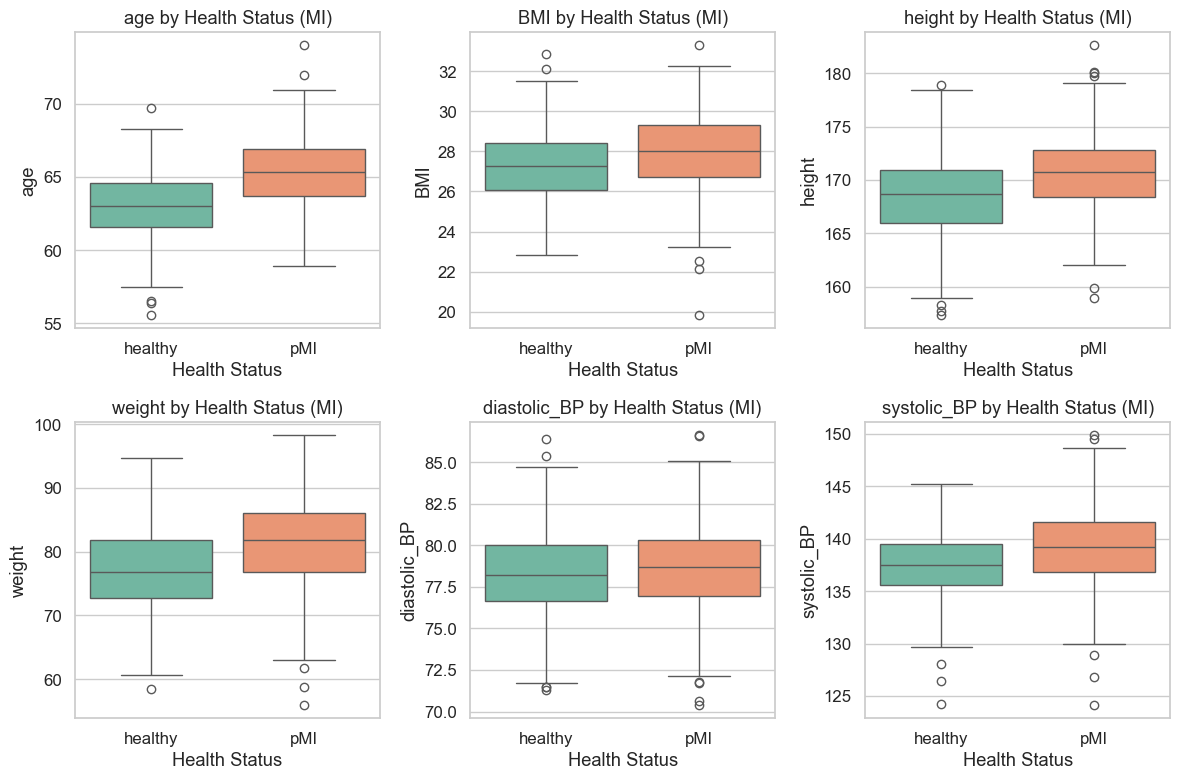

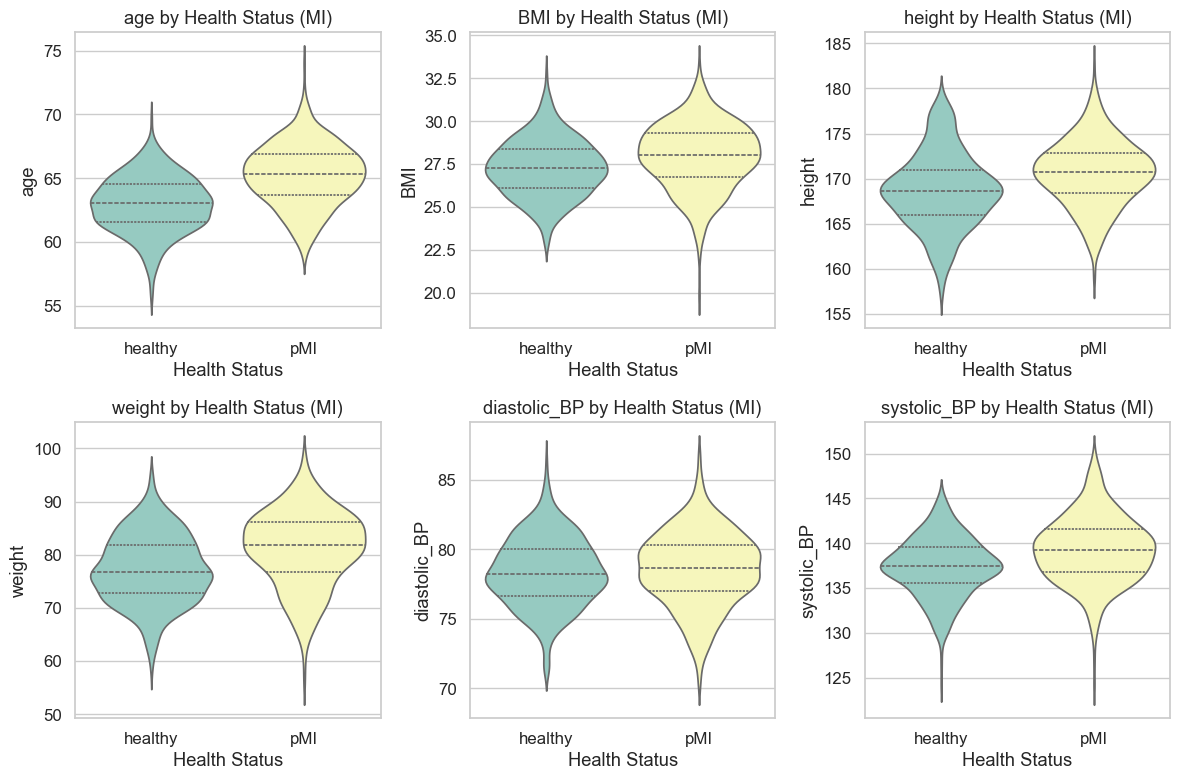

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features (excluding identifiers or non-numeric columns)
numeric_cols = ['age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP']

# Ensure 'MI' is categorical (for grouping)
demographic_data['MI'] = demographic_data['MI'].astype('category')

# Set up the visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- BOX PLOTS grouped by MI status ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=demographic_data, x='MI', y=col, palette="Set2", hue = "MI")
    plt.title(f'{col} by Health Status (MI)')
    plt.xlabel("Health Status")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# --- VIOLIN PLOTS grouped by MI status ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=demographic_data, x='MI', y=col, inner='quartile', palette="Set3", hue = "MI")
    plt.title(f'{col} by Health Status (MI)')
    plt.xlabel("Health Status")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

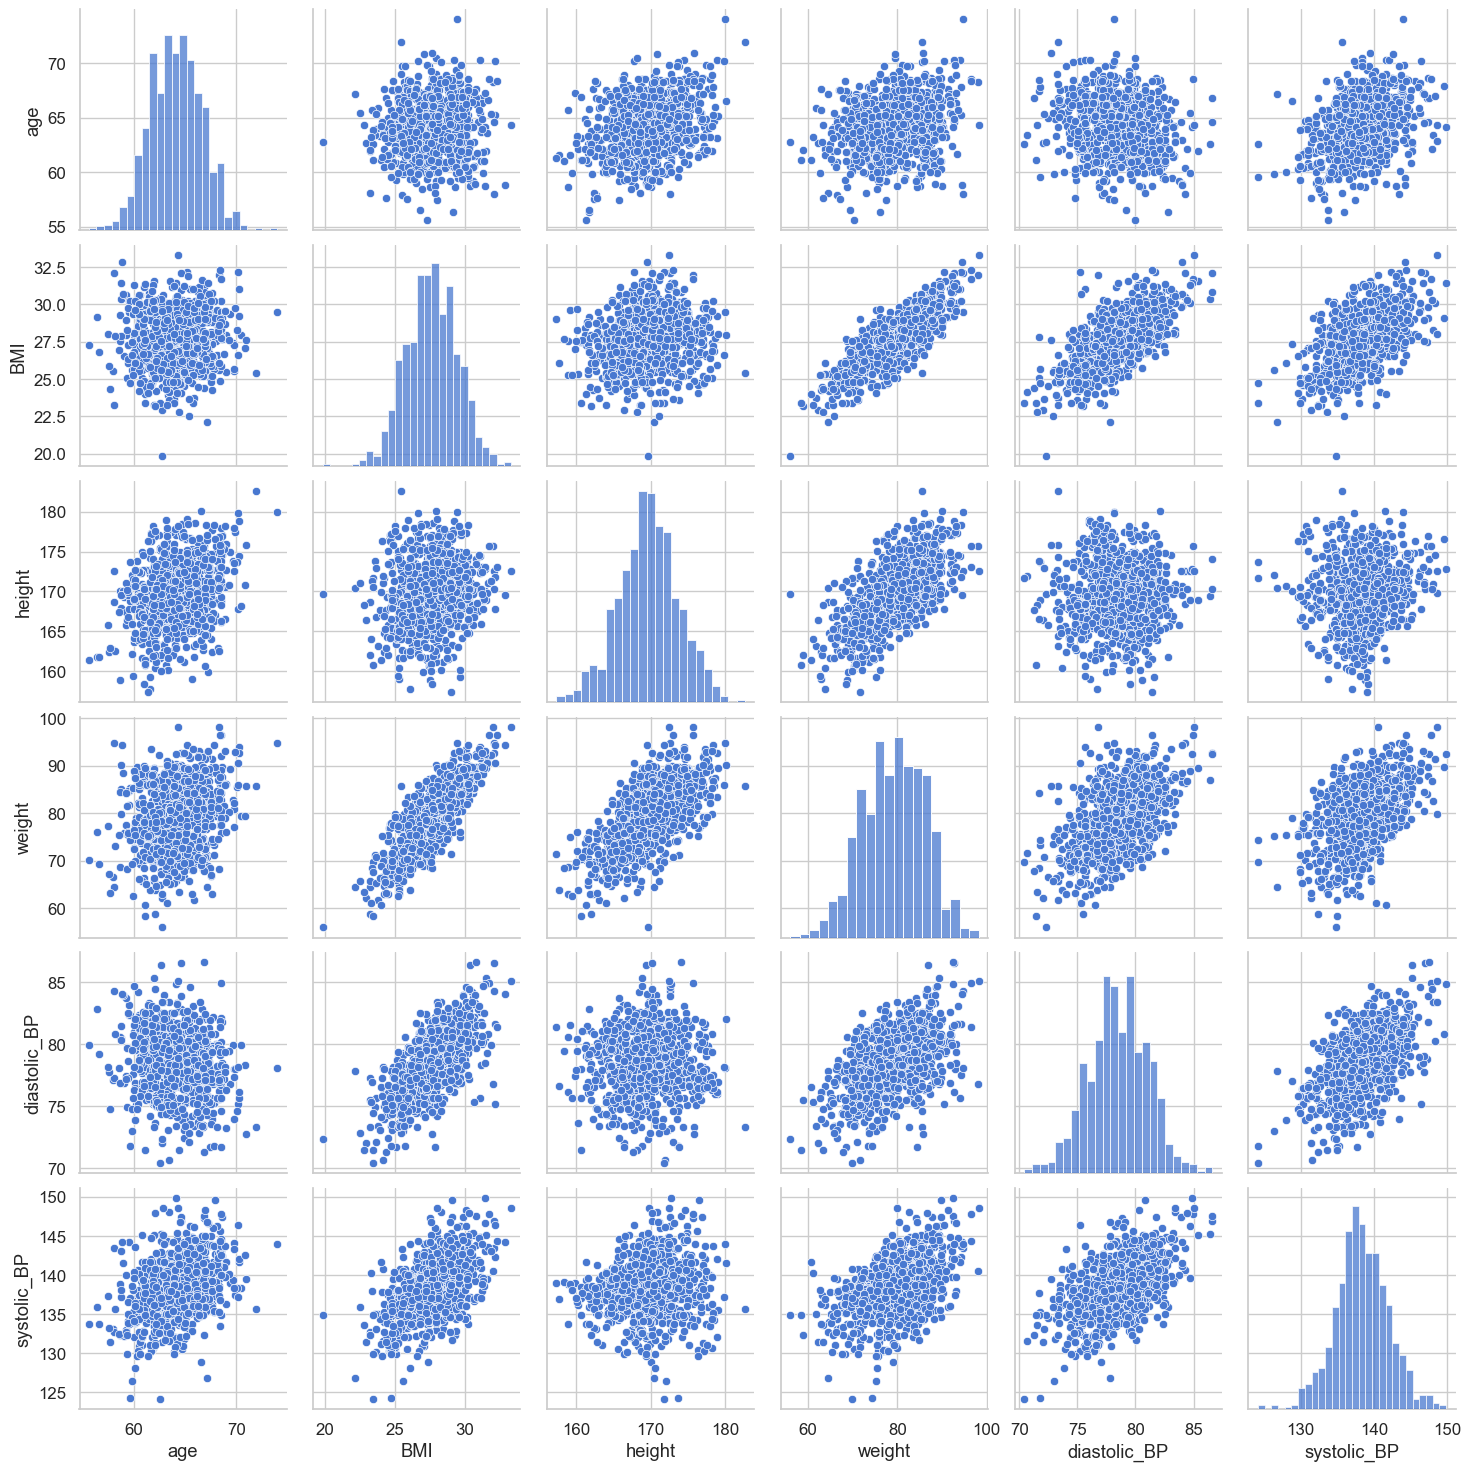

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

demographic_data = pd.read_csv("data/training_data/mixed_demographics.csv")

sns.pairplot(demographic_data[['age', 'BMI', 'height', 'weight', 'diastolic_BP', 'systolic_BP']], )